## Day 5 If You Give a Seed a Fertiliser

### Part A

Part A is basically me just brute-forcing the question.

In [73]:
# Part A

file = open('day_5_part_1.txt', 'r')

lines = file.readlines()

seeds = {}
lines = list(map(lambda x:x.strip(), lines))

seeds = {int(k):float('inf') for k in lines.pop(0).lstrip('seeds: ').split(' ')}
lines.pop(0)
lines.pop(0)

while lines:
    line = lines.pop(0)
    if line and line[0].isnumeric():
        dest, source, length = map(int, line.split(' '))
        for seed in seeds.keys():
            if seed >= source and seed <= (source + length - 1):
                seeds[seed] = min(seeds[seed], (seed - source) + dest)
    elif line:
        for key in seeds.keys():
            if seeds[key] == float('inf'):
                seeds[key] = key
        val = seeds.values()
        seeds = {seed:float('inf') for seed in val}

for key in seeds.keys():
    if seeds[key] == float('inf'):
        seeds[key] = key
val = seeds.values()
seeds = {seed:float('inf') for seed in val}

min(seeds)
#51580674

{630335678: inf, 71155519: inf, 260178142: inf, 125005421: inf, 1548082684: inf, 519777283: inf, 4104586697: inf, 30692976: inf, 1018893962: inf, 410959790: inf, 3570781652: inf, 45062110: inf, 74139777: inf, 106006724: inf, 3262608046: inf, 213460151: inf, 3022784256: inf, 121993130: inf, 2138898608: inf, 36769984: inf}


51580674

### Part B

**Intuition after 5 hours**

1. Let's define a ```boundary``` function that takes as parameters the lower bound ```lb``` and upper bound ```ub``` of a range/interval, and then the lower bound ```r1``` and upper bound ```r2``` of another interval, where the first interval consists of the integers from ```lb``` to ```ub``` inclusive and the second interval consists of integers from ```r1``` to ```r2``` inclusive. The function should return ```[-1,-1]``` if there is no overlap between the intervals, or the distance between ```r1``` and ```r2``` with ```lb```.The function should consider the following cases:
    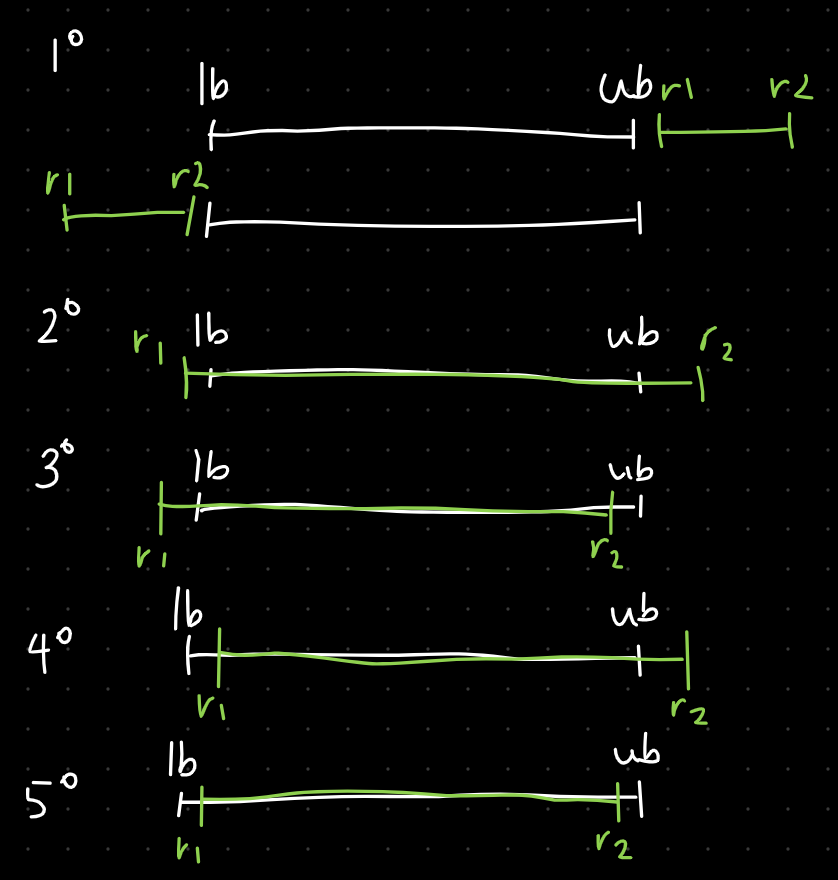

2. Iterate through each line. 
    1. If the line is one of the intervals consisting of ```{destination} {source} {length}``` then we append it to our ```intervals``` array.
    2. If the line is ```None | ''``` (line break) then we evaluate all of our seeds with each interval.
        - If there is no overlap (i.e. ```boundary``` returns ```[-1,-1]```) then we just skip the current iteration.
        - Otherwise, (i.e. there is an overlap) then we append that to ```temp```.
        - We check two other cases to see whether there exists another range that doesn't overlap with the current interval. If so, we append that range to ```seeds```, which we will search until empty.
        - If ```temp``` is empty then we know that the given range doesn't satisfy the current interval, so we append the current range to ```new_seeds```, which becomes the new 'queue' for the next layer. Otherwise we concatenate ```temp``` to ```new_seeds```.

In [138]:
# Part B

file = open('day_5_part_2.txt', 'r')
lines = file.readlines()
seeds = []
lines = list(map(lambda x:x.strip(), lines))

s = lines.pop(0).lstrip('seeds: ').split(' ')

i, j = 0, 2
while i < len(s):

    _source, _range = int(s[i:j][0]), int(s[i:j][1])

    seeds.append([_source, _source+_range-1])

    i += 2
    j += 2

lines.pop(0)
lines.pop(0)

def boundary(lb: int, ub: int, r1: int, r2: int) -> int: 
    #Calculate differences from lb

    #The interval [lb, ub] is a subset of the interval [r1, r2]

    if r1 > ub or r2 < lb:
        return [-1, -1]
    elif r1 < lb and r2 > ub:
        return [0, ub-lb]
    elif r1 < lb and r2 <= ub:
        return [0, r2-lb]
    elif r1 >= lb and r2 > ub:
        return [r1-lb, ub-lb]
    elif r1 >= lb and r2 <= ub:
        return [r1-lb, r2-lb]

lines.append('')

intervals = []
while lines:
    line = lines.pop(0)

    if line and line[0].isnumeric():
        dest, start, length = map(int, line.strip().split(' '))
        intervals.append([dest, start, start+length-1])

    elif not line:
        
        intervals.sort(key=lambda x:x[1])
        new_seeds = []

        while seeds:
            temp = []
            left, right = seeds.pop(0)

            for dest, start, end in intervals:

                dl, dr = boundary(start, end, left, right)
                if dl == -1 and dr == -1:
                    continue

                temp.append([dest+dl, dest+dr])
                if left < (start+dl-1):
                    seeds.append([left, start+dl-1])
                if right > (start+dr+1):
                    seeds.append([start+dr+1, right])

            if not temp:
                new_seeds.append([left, right])
            else:
                new_seeds.extend(temp)

        seeds = new_seeds
        intervals = []
        
seeds.sort(key=lambda x:x[0])
min(seeds)
#99751240

[99751240, 105230361]